In [114]:
import pandas as pd

import numpy as np

import matplotlib
import matplotlib.pyplot as plt

import sklearn
import sklearn.metrics as sm
from sklearn import datasets
from sklearn import metrics
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, adjusted_rand_score, accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, KFold
from sklearn.pipeline import Pipeline

import seaborn as sns

import scipy as sp
from scipy.spatial.distance import cdist

# import data from excel

In [42]:
df = pd.read_excel('Jobstreet_Data.xlsx')
df

,Position Title,Expected Salary,Experience,Education Level,Specialization
0,Graduate Research Assistant,-,0,Master,Civil/Construction
1,Graduated Research Assistant (GRA),-,0,Master,Science & Technology
2,People System Intern,-,0,Bach Degree,Advertising
3,-,-,0,Bach Degree,-
4,Intern,-,0,Bach Degree,Other Engineering
...,...,...,...,...,...
2171,Senior Production Engineer,"MYR 7,900",10 years,Bach Degree,Other Engineering
2172,QA Engineer,"SGD 3,200",3 years,Master,Quality Control
2173,Section Head II (Quality System),"MYR 8,800",38 years,Prof Cert,Quality Control
2174,Equipment Engineer,"MYR 9,000",15 years,Bach Degree,Electrical


# general infos

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2176 entries, 0 to 2175
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Position Title   2176 non-null   object
 1   Expected Salary  2176 non-null   object
 2   Experience       2176 non-null   object
 3   Education Level  2176 non-null   object
 4   Specialization   2176 non-null   object
dtypes: object(5)
memory usage: 85.1+ KB


# description of each columns

In [34]:
df.describe()

,Position Title,Expected Salary,Experience,Education Level,Specialization
count,2176,2176,2176,2176,2176
unique,1097,79,25,11,56
top,-,"MYR 2,500",0,Bach Degree,Manufacturing
freq,132,393,1026,1971,288


# rename columns

In [43]:
df.columns = ['pos', 'sal', 'exp', 'edu', 'spec']
df

,pos,sal,exp,edu,spec
0,Graduate Research Assistant,-,0,Master,Civil/Construction
1,Graduated Research Assistant (GRA),-,0,Master,Science & Technology
2,People System Intern,-,0,Bach Degree,Advertising
3,-,-,0,Bach Degree,-
4,Intern,-,0,Bach Degree,Other Engineering
...,...,...,...,...,...
2171,Senior Production Engineer,"MYR 7,900",10 years,Bach Degree,Other Engineering
2172,QA Engineer,"SGD 3,200",3 years,Master,Quality Control
2173,Section Head II (Quality System),"MYR 8,800",38 years,Prof Cert,Quality Control
2174,Equipment Engineer,"MYR 9,000",15 years,Bach Degree,Electrical


# lower case all strings

In [44]:
toLowerCase = ['pos', 'edu', 'spec']

for column in toLowerCase:
    df[column] = df[column].str.lower()

df

,pos,sal,exp,edu,spec
0,graduate research assistant,-,0,master,civil/construction
1,graduated research assistant (gra),-,0,master,science & technology
2,people system intern,-,0,bach degree,advertising
3,-,-,0,bach degree,-
4,intern,-,0,bach degree,other engineering
...,...,...,...,...,...
2171,senior production engineer,"MYR 7,900",10 years,bach degree,other engineering
2172,qa engineer,"SGD 3,200",3 years,master,quality control
2173,section head ii (quality system),"MYR 8,800",38 years,prof cert,quality control
2174,equipment engineer,"MYR 9,000",15 years,bach degree,electrical


# handle exp column

In [45]:
import re
## initial/default method
# df['exp'] = df['exp'].str.strip().str.replace(' years', '').fillna('0')
# df['exp'] = df['exp'].str.strip().str.replace(' year', '').fillna('0')



## method regex
# df['exp'].str.extract(r'(\d+)', expand=False)

# df['exp'] = re.sub("[a-zA-Z]", "", df['exp'])

## method np.where from stackoverflow
# np.where(df['exp'] != '0', 
#          df['exp'].str.strip().str.replace(' years', ''), 
#          df['exp'])

## method ghidwan
# convert 'object' to 'str'
df['exp'] = df['exp'].astype(str)

# function to change string
def cleanTweets(column):
    column = re.sub('[a-zA-Z]', '', column)
    return column

# go through each row in the selected column
for row in df.itertuples():
        df.at[row.Index, 'exp',] = cleanTweets(row.exp)

# convert str to int
df['exp'] = df['exp'].astype(int)

df

,pos,sal,exp,edu,spec
0,graduate research assistant,-,0,master,civil/construction
1,graduated research assistant (gra),-,0,master,science & technology
2,people system intern,-,0,bach degree,advertising
3,-,-,0,bach degree,-
4,intern,-,0,bach degree,other engineering
...,...,...,...,...,...
2171,senior production engineer,"MYR 7,900",10,bach degree,other engineering
2172,qa engineer,"SGD 3,200",3,master,quality control
2173,section head ii (quality system),"MYR 8,800",38,prof cert,quality control
2174,equipment engineer,"MYR 9,000",15,bach degree,electrical


# handle salary column

## Method 1 (Affine's method)

In [46]:
#  select all rows in 'sal' column with value starts with 'MYR'
condition = df['sal'].str.startswith('MYR')
df = df[condition].reset_index(drop = True)

# replace 'MYR ' with ''
df['sal'] = df['sal'].str.replace('MYR ', '')

# remove ',' and convert string/object to int
df['sal'] = df['sal'].str.replace('[^a-zA-Z0-9]', '').astype(int)

df

C:\Users\rhmnnmhmd\AppData\Local\Temp\ipykernel_8316\153897430.py:9: FutureWarning: The default value of regex will change from True to False in a future version.
  df['sal'] = df['sal'].str.replace('[^a-zA-Z0-9]', '').astype(int)


,pos,sal,exp,edu,spec
0,internship student,1,0,bach degree,manufacturing
1,junior biomedical engineer,1,0,bach degree,manufacturing
2,fresh graduate,1,0,bach degree,electrical
3,-,1,0,bach degree,-
4,research assistant intern,1,1,bach degree,chemical engineering
...,...,...,...,...,...
2076,senior project engineer,7888,15,master,civil/construction
2077,senior production engineer,7900,10,bach degree,other engineering
2078,section head ii (quality system),8800,38,prof cert,quality control
2079,equipment engineer,9000,15,bach degree,electrical


## Method 2:
* change '-' to NA
* drop 'SGD'
* fill NA with median

In [ ]:
# change '-' in sal column into NaN
df['sal'].replace('-', np.NaN)

# drop 'SGD' and reset index
df.drop(2172).reset_index(drop = True)

# fill NA with median
df['sal'].fillna(df['sal'].median())

# Handling 'pos' column 

In [47]:
df['pos'].value_counts()
# we can see below, there are 116 entries of '-' in the pos column

-                                      116
process engineer                        58
intern                                  57
internship student                      46
internship trainee                      46
                                      ... 
cell qa supervisor                       1
freelance drafter                        1
it officer (maintanance)                 1
quality supervisor                       1
sr quality and reliability engineer      1
Name: pos, Length: 988, dtype: int64

In [48]:
# select rows where pos not equal to '-'
df = df[df['pos'] != '-']
df['pos'].value_counts()

process engineer                       58
intern                                 57
internship student                     46
internship trainee                     46
project engineer                       44
                                       ..
cell qa supervisor                      1
freelance drafter                       1
it officer (maintanance)                1
quality supervisor                      1
sr quality and reliability engineer     1
Name: pos, Length: 987, dtype: int64

# Handling spec column

In [49]:
df['spec'].value_counts().sort_index()
#there are 78 entries with '-' as the value

-                             78
actuarial/statistics           1
advertising                    2
agriculture                    3
architect/interior design      2
armed forces                   1
arts/creative design           4
aviation                      10
banking/financial              5
biotechnology                  2
chemical engineering         101
chemistry                     19
civil/construction            79
clerical/general admin        15
customer service               9
education                     19
electrical                   176
electronics                  237
entertainment                  1
environmental                 25
food tech/nutritionist         5
food/beverage/restaurant      17
general work                   2
general/cost accounting        2
hotel/tourism                  1
human resources                3
industrial engineering        93
it-hardware                   16
it-network/sys/db admin       16
it-software                   27
law/legal 

In [50]:
#we remove this
df = df[df['spec'] != '-']
df['spec'].value_counts().sort_index()

actuarial/statistics           1
advertising                    2
agriculture                    3
architect/interior design      2
armed forces                   1
arts/creative design           4
aviation                      10
banking/financial              5
biotechnology                  2
chemical engineering         101
chemistry                     19
civil/construction            79
clerical/general admin        15
customer service               9
education                     19
electrical                   176
electronics                  237
entertainment                  1
environmental                 25
food tech/nutritionist         5
food/beverage/restaurant      17
general work                   2
general/cost accounting        2
hotel/tourism                  1
human resources                3
industrial engineering        93
it-hardware                   16
it-network/sys/db admin       16
it-software                   27
law/legal services             1
logistics/

In [51]:
# change 'chemical engineering' and 'chemistry' to 'chemistry-related'
# df['spec'] = np.where((df['spec'] == 'chemical engineering') | (df['spec'] == 'chemistry'), 'chemistry-related', df['spec'])
df.loc[(df['spec'] == 'chemical engineering') | (df['spec'] == 'chemistry'), ['spec']] = 'chemistry-related'

# change 'it-hardware' and 'it-network/sys/db admin' to 'it'
# df['spec'] = np.where((df['spec'] == 'it-hardware') | (df['spec'] == 'it-network/sys/db admin') | (df['spec'] == 'it-software'), 
#                       'it', df['spec'])
df.loc[(df['spec'] == 'it-hardware') | (df['spec'] == 'it-network/sys/db admin') | (df['spec'] == 'it-software'), ['spec']] = 'it'

# # change 'electronics' and 'electrical' to 'electric-related'
#df['spec'] = np.where((df['spec'] == 'electronics') | (df['spec'] == 'electrical'), 'electric-related', df['spec'])
df.loc[(df['spec'] == 'electronics') | (df['spec'] == 'electrical'), ['spec']] = 'electrical-related'

# # change 'food tech/nutritionist ' and 'food/beverage/restaurant' to 'food'
#df['spec'] = np.where((df['spec'] == 'food tech/nutritionist') | (df['spec'] == 'food/beverage/restaurant'), 'food', df['spec'])
df.loc[(df['spec'] == 'food tech/nutritionist') | (df['spec'] == 'food/beverage/restaurant'), ['spec']] = 'food'

# # change more things lmao
# df['spec'] = np.where((df['spec'] == 'sales-corporate') | (df['spec'] == 'sales-eng/tech/it') | (df['spec'] == 'sales-financial services') 
#                       | (df['spec'] == 'sales-retail/general'), 'sales', df['spec'])
df.loc[(df['spec'] == 'sales-corporate') | (df['spec'] == 'sales-eng/tech/it') | (df['spec'] == 'sales-financial services') 
        | (df['spec'] == 'sales-retail/general'), ['spec']] = 'sales'

In [52]:
# check 'spec' column
df['spec'].value_counts().sort_index()
# all corrected!!!

actuarial/statistics           1
advertising                    2
agriculture                    3
architect/interior design      2
armed forces                   1
arts/creative design           4
aviation                      10
banking/financial              5
biotechnology                  2
chemistry-related            120
civil/construction            79
clerical/general admin        15
customer service               9
education                     19
electrical-related           413
entertainment                  1
environmental                 25
food                          22
general work                   2
general/cost accounting        2
hotel/tourism                  1
human resources                3
industrial engineering        93
it                            59
law/legal services             1
logistics/supply chain        12
maintenance                   76
manufacturing                283
marketing/business dev         6
mechanical/automotive        273
nurse/medi

In [53]:
# check the whole dataframe itself
df

,pos,sal,exp,edu,spec
0,internship student,1,0,bach degree,manufacturing
1,junior biomedical engineer,1,0,bach degree,manufacturing
2,fresh graduate,1,0,bach degree,electrical-related
4,research assistant intern,1,1,bach degree,chemistry-related
5,cbm engineer (ultrasound inspector),300,3,bach degree,electrical-related
...,...,...,...,...,...
2076,senior project engineer,7888,15,master,civil/construction
2077,senior production engineer,7900,10,bach degree,other engineering
2078,section head ii (quality system),8800,38,prof cert,quality control
2079,equipment engineer,9000,15,bach degree,electrical-related


# MACHINE LEARNING (CLUSTERING)

## Encode categorical features

In [88]:
#fit Ordinal Encoder to the categorical features
oe = OrdinalEncoder()
oe.fit(df[['pos', 'edu', 'spec']])

OrdinalEncoder()

In [95]:
# transfrom each feature
df[['pos', 'edu', 'spec']] = oe.transform(df[['pos', 'edu', 'spec']])

In [96]:
# check the encoded dataframe
df

,pos,sal,exp,edu,spec
0,318.0,1,0,1.0,27.0
1,342.0,1,0,1.0,27.0
2,249.0,1,0,1.0,14.0
4,716.0,1,1,1.0,9.0
5,93.0,300,3,1.0,14.0
...,...,...,...,...,...
2076,758.0,7888,15,5.0,10.0
2077,757.0,7900,10,1.0,32.0
2078,745.0,8800,38,8.0,38.0
2079,209.0,9000,15,1.0,14.0


## instantiate model

In [100]:
kmeans = KMeans(n_clusters = 3, random_state = 42)

## Fit model

In [101]:
kmeans.fit(df)

KMeans(n_clusters=3, random_state=42)

## Predict cluster labels for each sample 

In [105]:
label = kmeans.fit_predict(df)
label

array([1, 1, 1, ..., 2, 2, 2])

## create new 'label' column in df

In [106]:
df['label'] = label
df

,pos,sal,exp,edu,spec,label
0,318.0,1,0,1.0,27.0,1
1,342.0,1,0,1.0,27.0,1
2,249.0,1,0,1.0,14.0,1
4,716.0,1,1,1.0,9.0,1
5,93.0,300,3,1.0,14.0,1
...,...,...,...,...,...,...
2076,758.0,7888,15,5.0,10.0,2
2077,757.0,7900,10,1.0,32.0,2
2078,745.0,8800,38,8.0,38.0,2
2079,209.0,9000,15,1.0,14.0,2


## visualize 

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


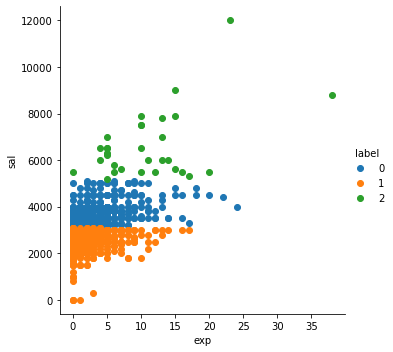

In [109]:
sns.FacetGrid(df, hue = "label", size = 5).map(plt.scatter, 'exp', "sal").add_legend()
plt.show()

## Optimizing

### visualize distortion vs model complexity (k value)

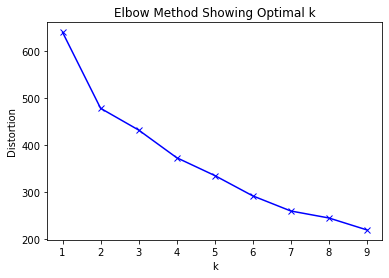

In [112]:
df_for_opt = df.drop('label', axis = 1)

distortions = []

# list of k-numbers
K = range(1, 10)

#loop/iterate for each model with different clustering number
for k in K:
    #initialize model
    kMeanModel = KMeans(n_clusters = k, random_state = 42)
    
    #fit the model to the input ndarray
    kMeanModel.fit(df_for_opt)
    
    #calculate distance between training sets and centroids of the model
    distance = cdist(df_for_opt, kMeanModel.cluster_centers_, "euclidean")
    
    #for each training set, take its minimum distance
    minDistance = np.min(distance, axis = 1)
    
    #take sum of the minDistance above
    sumDistance = sum(minDistance)
    
    #sum of distance divided by the number of training sets
    var = sumDistance / df_for_opt.shape[0]
    
    #append the distortions list with the distortion for each model
    distortions.append(var)
    
#plotting
plt.plot(K, distortions, "bx-")
plt.xlabel("k")
plt.ylabel("Distortion")
plt.title("Elbow Method Showing Optimal k")
plt.show()

### GridSearchCV: Optimizing paramters

In [116]:
# create cross-validation object
kf = KFold(shuffle = True, random_state = 42)

# create model
KMeansCV = KMeans()

# paramaters to search through
params = {
          'n_clusters': np.arange(1, 10, 1, dtype = np.int),
          'init': ['k-means++', 'random'],
          'algorithm': ['lloyd', 'elkan', 'auto', 'full']
         }

grid_search = GridSearchCV(KMeansCV, param_grid = params, cv = kf)

C:\Users\rhmnnmhmd\AppData\Local\Temp\ipykernel_8316\1751378000.py:9: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  'n_clusters': np.arange(1, 10, 1, dtype = np.int),


In [117]:
# fit grid_seaarch to data
grid_search.fit(df_for_opt)

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:965: RuntimeWarning: algorithm='elkan' doesn't make sense for a single cluster. Using 'full' instead.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:965: RuntimeWarning: algorithm='elkan' doesn't make sense for a single cluster. Using 'full' instead.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:965: RuntimeWarning: algorithm='elkan' doesn't make sense for a single cluster. Using 'full' instead.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:965: RuntimeWarning: algorithm='elkan' doesn't make sense for a single cluster. Using 'full' instead.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:965: RuntimeWarning: algorithm='elkan' doesn't make sense for a single cluster. Using 'full' instead.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\clus

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=KMeans(),
             param_grid={'algorithm': ['lloyd', 'elkan', 'auto', 'full'],
                         'init': ['k-means++', 'random'],
                         'n_clusters': array([1, 2, 3, 4, 5, 6, 7, 8, 9])})

In [118]:
grid_search.best_score_

-34152524.617074974

In [121]:
grid_search.best_params_

{'algorithm': 'auto', 'init': 'random', 'n_clusters': 9}

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


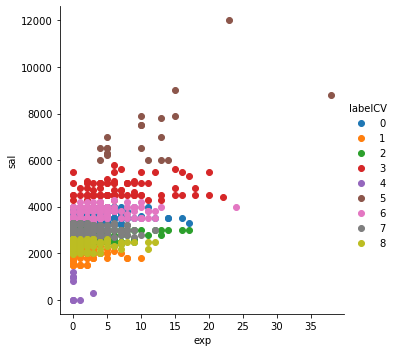

In [122]:
# add new 'labelCV' column to predictors dataframe
df_for_opt['labelCV'] = grid_search.predict(df_for_opt)

#visualize
sns.FacetGrid(df_for_opt, hue = "labelCV", size = 5).map(plt.scatter, 'exp', "sal").add_legend()
plt.show()